In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from pmdarima import auto_arima
from statsmodels.tsa.statespace.varmax import VARMAX,VARMAXResults
from statsmodels.tsa.stattools import adfuller
    
#To Ignore Warning messages

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\envs\myenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HP\anaconda3\envs\myenv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\\Data\\M2SL.csv",index_col='DATE',parse_dates=True)

sp=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\\Data\\PCE.csv",index_col='DATE',parse_dates=True)

In [3]:
index=pd.date_range('1995-01-01','2020-10-01',freq='MS')

In [4]:
df.index=index
sp.index=index

In [5]:
df=df.join(sp)
df=df.iloc[:252]

<AxesSubplot:>

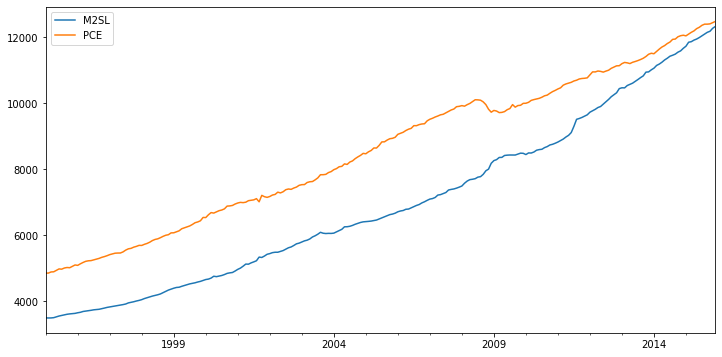

In [6]:
df.plot(figsize=(12,6))

In [7]:
df.columns=['Money','Spendings']

In [8]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [9]:
auto_arima(df['Money'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 2, 1), scoring_args={}, with_intercept=False)

In [10]:
auto_arima(df['Spendings'],maxiter=1000)

ARIMA(maxiter=1000, order=(1, 1, 2), scoring_args={})

In [11]:
df_transformed=df.diff().diff()

In [12]:
df_transformed=df_transformed.dropna()

In [13]:
df_transformed.head()

,Money,Spendings
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [14]:
nobs=12

In [15]:
train=df_transformed.iloc[:-nobs]
test=df_transformed.iloc[-nobs:]

### FITTING THE VARMA MODEL

In [16]:
model=VARMAX(train,order=(1,2),trend='c')

In [17]:
results=model.fit(maxiter=1000,disp=False)

In [18]:
results.summary()

Dep. Variable:,"['Money', 'Spendings']",No. Observations:,238
Model:,"VARMA(1,2)",Log Likelihood,-2286.608
,+ intercept,AIC,4607.216
Date:,"Wed, 02 Dec 2020",BIC,4666.244
Time:,02:31:52,HQIC,4631.005
Sample:,03-01-1995,,
,- 12-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"68.57, 28.21",Jarque-Bera (JB):,"549.34, 121.76"
Prob(Q):,"0.00, 0.92",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"5.55, 2.93",Skew:,"1.34, -0.35"


#### FORECASTING

In [19]:
df_forecast=results.forecast(12)

In [20]:
df_forecast

,Money,Spendings
2015-01-01,-11.283546,33.124088
2015-02-01,-10.594356,-4.143828
2015-03-01,1.685305,-0.077187
2015-04-01,-1.823164,-0.302062
2015-05-01,1.258843,0.298354
2015-06-01,-0.554415,0.001446
2015-07-01,0.637427,0.208365
2015-08-01,-0.119855,0.079089
2015-09-01,0.366192,0.162487
2015-10-01,0.055175,0.109203


In [22]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money_1']=df_forecast['Money'].cumsum()+(df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2])

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast']=df_forecast['Money_1'].cumsum()+df['Money'].iloc[-nobs-1]

In [23]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spendings_1']=df_forecast['Spendings'].cumsum()+(df['Spendings'].iloc[-nobs-1]-df['Spendings'].iloc[-nobs-2])

# Now build the forecast values from the first difference set
df_forecast['SpendingsForecast']=df_forecast['Spendings_1'].cumsum()+df['Spendings'].iloc[-nobs-1]

In [24]:
df_forecast

,Money,Spendings,Money_1,MoneyForecast,Spendings_1,SpendingsForecast
2015-01-01,-11.283546,33.124088,66.116454,11734.116454,47.924088,12112.924088
2015-02-01,-10.594356,-4.143828,55.522098,11789.638552,43.780260,12156.704348
2015-03-01,1.685305,-0.077187,57.207404,11846.845956,43.703074,12200.407422
2015-04-01,-1.823164,-0.302062,55.384239,11902.230196,43.401012,12243.808433
2015-05-01,1.258843,0.298354,56.643083,11958.873278,43.699365,12287.507798
2015-06-01,-0.554415,0.001446,56.088668,12014.961947,43.700811,12331.208610
2015-07-01,0.637427,0.208365,56.726095,12071.688042,43.909176,12375.117785
2015-08-01,-0.119855,0.079089,56.606240,12128.294282,43.988265,12419.106050
2015-09-01,0.366192,0.162487,56.972433,12185.266715,44.150752,12463.256803
2015-10-01,0.055175,0.109203,57.027608,12242.294323,44.259956,12507.516759


In [28]:
X=pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingsForecast']]],axis=1)

<AxesSubplot:>

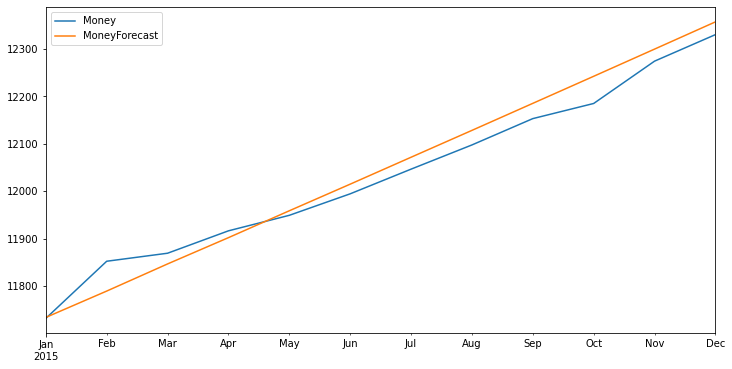

In [32]:
X[['Money','MoneyForecast']].plot(figsize=(12,6))

<AxesSubplot:>

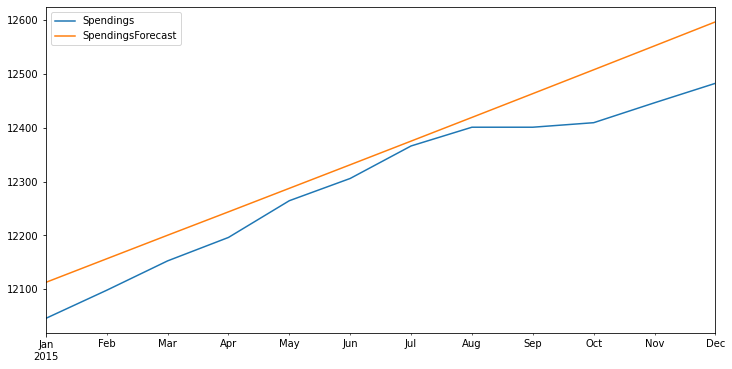

In [33]:
X[['Spendings','SpendingsForecast']].plot(figsize=(12,6))